In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import StandardScaler
import random

C:\Users\hp\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import os
os.chdir(r'C:\Users\hp\Desktop\disha\stocks\Data\Stocks')

In [3]:
data = pd.read_csv(r"C:\Users\hp\Desktop\disha\stocks\Data\Stocks\ibm.us.txt")

In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

In [5]:
data['mid'] = (data['High']+data['Low'])/2

In [6]:
scaler = StandardScaler()
scaler.fit(data.mid.values.reshape(-1,1))
data.mid = scaler.transform(data.mid.values.reshape(-1,1))


In [7]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt,mid
0,1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,0,-0.855721
1,1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,0,-0.855891
2,1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,0,-0.855975
3,1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,0,-0.858094
4,1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,0,-0.860889


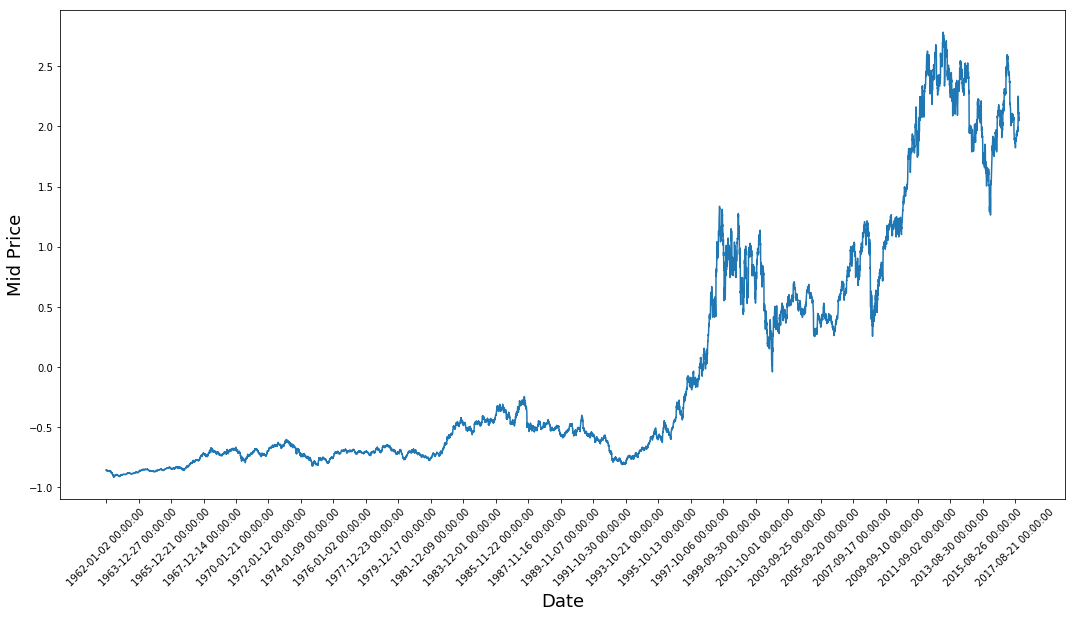

In [8]:
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),data['mid'])
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [9]:
train = data[data.Date.dt.year <=2002]
test = data[data.Date.dt.year > 2002]

In [10]:
train = train.drop(['Date','OpenInt'],1)
test = test.drop(['Date','OpenInt'],1)

In [11]:
train_X, train_y = train.values[:, :-1], train.values[:, -1]
test_X, test_y = test.values[:, :-1], test.values[:, -1]

In [12]:
# RESHAPING TRAIN AND TEST DATA

train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
step_size = 1

In [13]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('linear'))

In [20]:
model.compile(loss='mean_absolute_error', optimizer='adam') 
model.fit(train_X, train_y, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
 - 36s - loss: 0.2671
Epoch 2/10
 - 34s - loss: 0.2672
Epoch 3/10
 - 35s - loss: 0.2670
Epoch 4/10
 - 35s - loss: 0.2672
Epoch 5/10
 - 34s - loss: 0.2670
Epoch 6/10
 - 35s - loss: 0.2671
Epoch 7/10
 - 34s - loss: 0.2669
Epoch 8/10
 - 34s - loss: 0.2668
Epoch 9/10
 - 35s - loss: 0.2669
Epoch 10/10
 - 36s - loss: 0.2671
